In [23]:
import torch
from torch import nn
from torchvision.transforms import ToTensor

import numpy as np
import matplotlib.pyplot as plt

import time

import utils
import utils.data, utils.ML, utils.models

In [18]:
plt.rcParams["figure.figsize"] = [4.3, 3]
torch.manual_seed(0)

In [3]:
device = 'cpu'

In [4]:
batch_size = 512
print(f"Using batch size = {batch_size}")

dataloaders = utils.data.get_MNIST_data_loaders(batch_size=batch_size)
train_dataloader, val_dataloader, test_dataloader = dataloaders

Using batch size = 512


In [5]:
X, y = next(iter(train_dataloader))
print(X.shape)

torch.Size([512, 1, 28, 28])


In [77]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=(3,3), stride=1, padding=1)
        self.flatten = nn.Flatten()
        self.dense1 = nn.Linear(28*28*10, 10)
        
    def forward(self, x):
        conv_out = self.conv1(x)
        x = self.flatten(conv_out)
        x = self.dense1(x)
        return x
        

In [78]:
# Re-instantiate model to re-initialize weights:
model = SimpleCNN().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 25

train_loss_log, val_loss_log = utils.ML.train_model(
    model,
    train_dataloader,
    val_dataloader,
    optimizer,
    loss_fn,
    num_epochs,
    device=device)

 epoch:  1, training loss: 0.554, validation loss 0.343, validation accuracy 0.902
 epoch:  2, training loss: 0.313, validation loss 0.312, validation accuracy 0.909
 epoch:  3, training loss: 0.292, validation loss 0.309, validation accuracy 0.912
 epoch:  4, training loss: 0.285, validation loss 0.307, validation accuracy 0.914
 epoch:  5, training loss: 0.277, validation loss 0.301, validation accuracy 0.915
 epoch:  6, training loss: 0.271, validation loss 0.294, validation accuracy 0.919
 epoch:  7, training loss: 0.268, validation loss 0.297, validation accuracy 0.915
 epoch:  8, training loss: 0.265, validation loss 0.297, validation accuracy 0.916
 epoch:  9, training loss: 0.262, validation loss 0.305, validation accuracy 0.915
 epoch: 10, training loss: 0.258, validation loss 0.296, validation accuracy 0.919
 epoch: 11, training loss: 0.256, validation loss 0.297, validation accuracy 0.919
 epoch: 12, training loss: 0.254, validation loss 0.300, validation accuracy 0.918
 epo

train loss:      0.22878, accuracy: 0.93624
validation loss: 0.30233, accuracy: 0.91670
test loss:       0.27914, accuracy: 0.92320


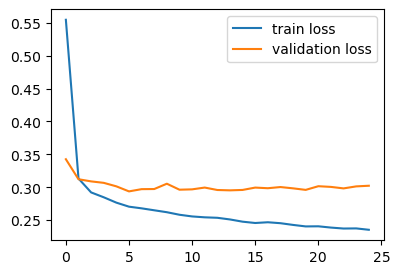

In [79]:
utils.ML.print_overall_metrics(model, dataloaders, loss_fn, device=device)

# Plot train and validation losses:
plt.figure()
plt.plot(train_loss_log)
plt.plot(val_loss_log)
plt.legend(["train loss", "validation loss"])

In [81]:
X, y = next(iter(test_dataloader))

X_conv = model.conv1(X)

print(X_conv.shape)

num_kernels = X_conv.shape[1]

torch.Size([512, 10, 28, 28])


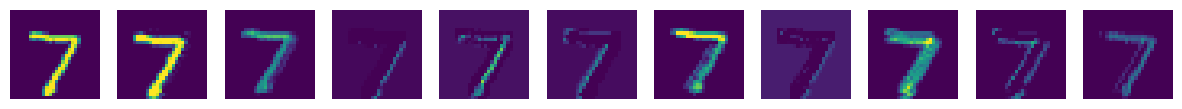

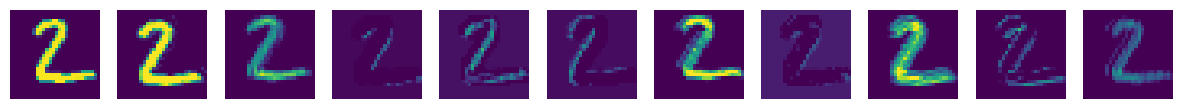

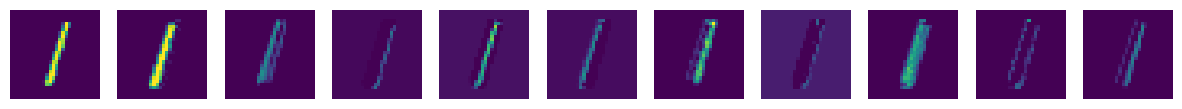

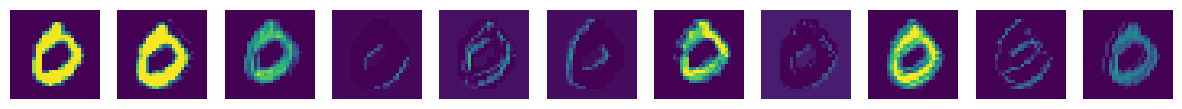

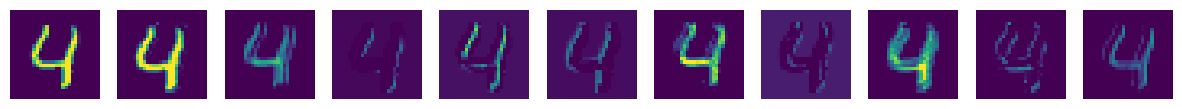

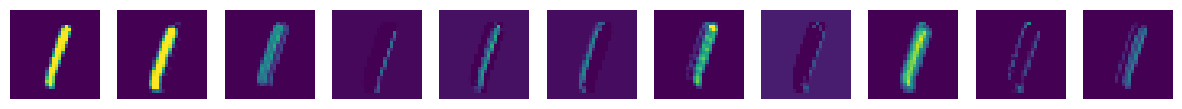

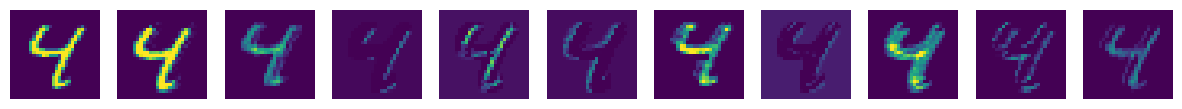

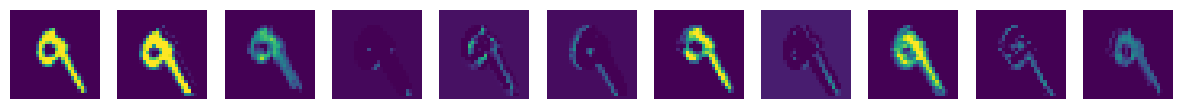

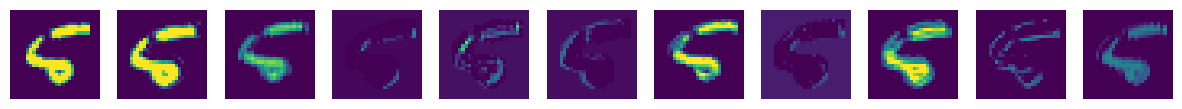

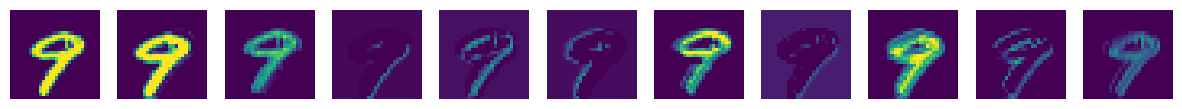

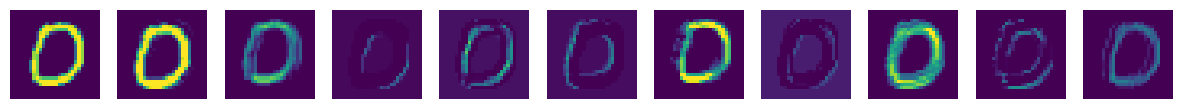

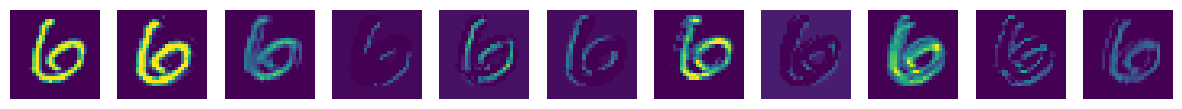

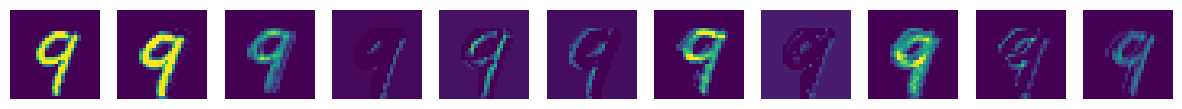

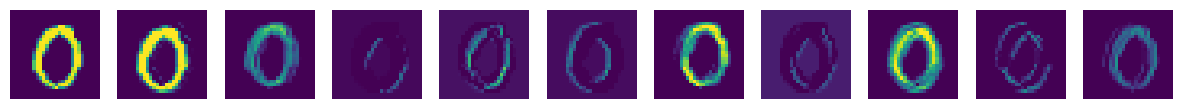

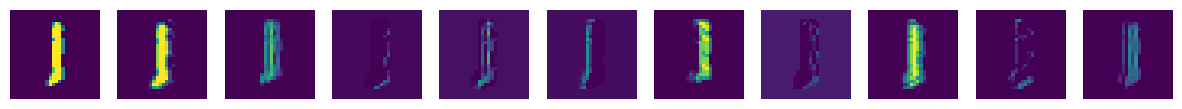

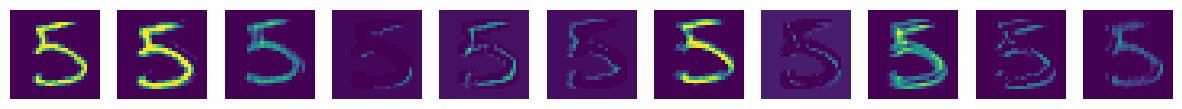

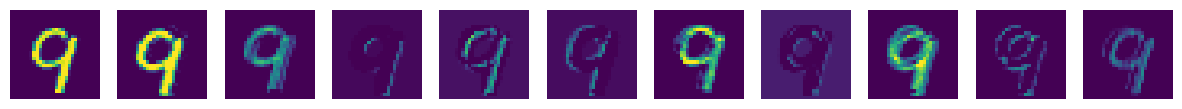

In [84]:
for i in range(batch_size):
    fig, ax = plt.subplots(1, num_kernels+1, squeeze=True, figsize=(15, 15))
    ax[0].imshow(X[i, 0], vmin=0, vmax=1)
    ax[0].axis('off')
    
    for j in range(num_kernels):
        ax[j+1].imshow(X_conv[i, j].detach().numpy(), vmin=0, vmax=1)
        ax[j+1].axis('off')
    
    if i > 15:
        break
    

In [86]:
conv_kernels = next(iter(model.parameters()))
print(conv_kernels.shape)

print(conv_kernels)

torch.Size([10, 1, 3, 3])
Parameter containing:
tensor([[[[ 0.1919,  0.3332,  0.4765],
          [-0.4874,  0.5600,  0.4741],
          [ 0.2452, -0.3256, -0.1088]]],


        [[[ 0.1457, -0.2035, -0.0271],
          [ 0.1019, -0.0566,  0.3114],
          [ 0.2450, -0.0115,  0.3521]]],


        [[[ 0.5044, -0.4170, -0.1042],
          [-0.1199, -0.3013, -0.4695],
          [-0.2338, -0.1463, -0.0209]]],


        [[[-0.4337,  0.2308,  0.0384],
          [ 0.3003,  0.3592, -0.1873],
          [-0.1815,  0.3391, -0.5270]]],


        [[[-0.3639, -0.2356,  0.4016],
          [ 0.0432, -0.3576, -0.1382],
          [-0.2960,  0.2420,  0.2080]]],


        [[[-0.0874, -0.4258, -0.2114],
          [ 0.5268,  0.3923, -0.2434],
          [ 0.3950,  0.0329,  0.3879]]],


        [[[ 0.2205, -0.1945, -0.2563],
          [ 0.0957,  0.0412,  0.0393],
          [-0.4630,  0.4039, -0.2718]]],


        [[[ 0.2779,  0.2590,  0.2811],
          [ 0.2484, -0.2446, -0.1447],
          [-0.2181,  0.3186

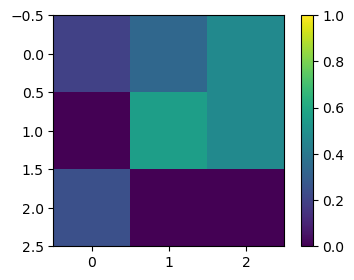

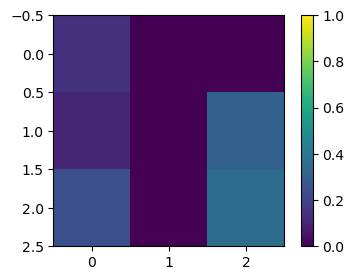

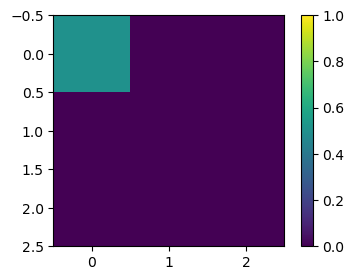

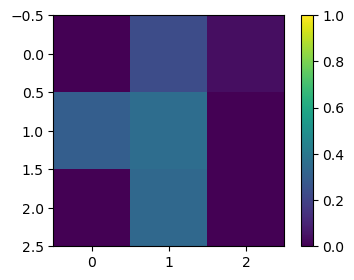

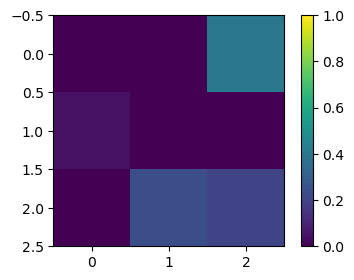

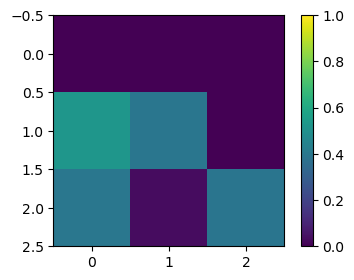

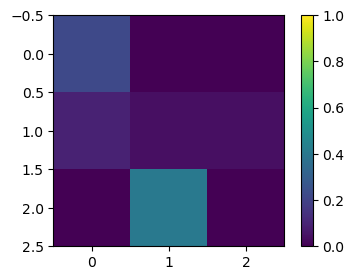

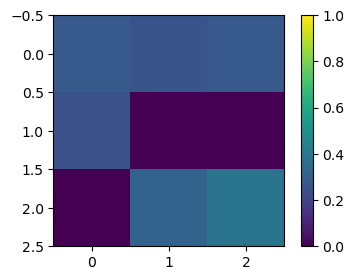

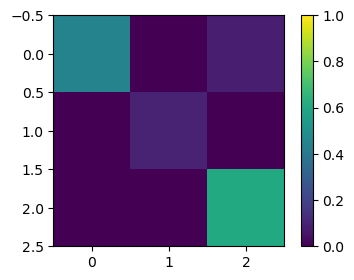

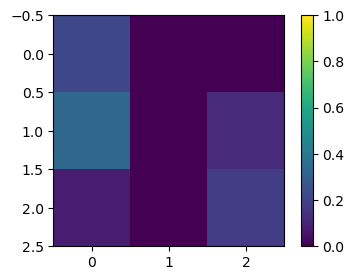

In [87]:
for conv_kernel in conv_kernels:

    plt.figure()
    plt.imshow(conv_kernel.detach().numpy().squeeze(), vmin=0, vmax=1)
    plt.colorbar()